# Effect of T on Instanton

In this notebook we investigate the effect of T, the length of time the instanton runs for, on the MAM algorithm. Specifically we look at this for the Kramer problem.

In [1]:
# Instanton Code Imports
import sys
sys.path.append('/rds/general/user/cfn18/home/Instantons/L96-EBM-Instanton')
    
from mam import Mam_alg
from instanton_utility import *
    
# Standard Package imports
import numpy as np
import numpy.linalg as la
import numpy.random as rm
from scipy.linalg import expm

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def drift(x, s):
    epsilon, sigma = s
    return x * (1 - x**2)

In [3]:
# Fixed Parameter Specification

# Kramer Parameters
eps = 0.01
sigma = 0.0001
s = [eps, sigma]
D = sigma **2
Dinv = 1/D

# Boundary Conditions
initial_point = -1
final_point = 0
bc = [initial_point, final_point]

#Time
t0 = 0

# BFGS Options
options={'maxiter': int(1.e6), 'maxfun': int(1.e6)} 

## T Experiment Loop

This is the code that was used to run the experiment.

In [4]:
# T Choices

Ts = [2.5, 5, 10, 20, 40, 80]

In [5]:
# not_converged = []

# for T in tqdm(Ts):
    
#     save_name = f'T-Experiment-Data/T{T}'.replace('.', '_')
#     print(f'\nWorking on T = {T}\n')

#     # Time
#     if (T>9):
#         dt=0.1
#     else:
#         dt=0.01
        
#     steps = int((T-t0)/dt) + 1
#     time = np.arange(t0, T + dt, dt)

#     # Instanton Initialisation
#     inst_ic = np.linspace(initial_point, final_point, len(time))
#     ou_mam = Mam_alg(drift, s, Dinv, inst_ic, time) # Default bounds used
    
#     # Keep Runnning Til convergence
#     result = ou_mam.run(options)
    
#     if (result.status == 0):
#         p = [s, bc, time, inst_ic.shape]
#         save_result(result, p, save_name)
        
#     else:
#         print(f'\n\nFor T= {T}, did not converge in time\n\n')
#         not_converged.append(result)

## Loading Experiment Results

In [6]:
t_experiment = []

for T in Ts[:-1]: #T=80 unstable
    save_name = f'T-Experiment-Data/T{T}'.replace('.', '_')
    result, s, bc, time, shape = load_result(save_name)
    t_experiment.append((time, result.x))

Loading T-Experiment-Data/T2_5
Loading T-Experiment-Data/T5
Loading T-Experiment-Data/T10
Loading T-Experiment-Data/T20
Loading T-Experiment-Data/T40


## Plotting Results

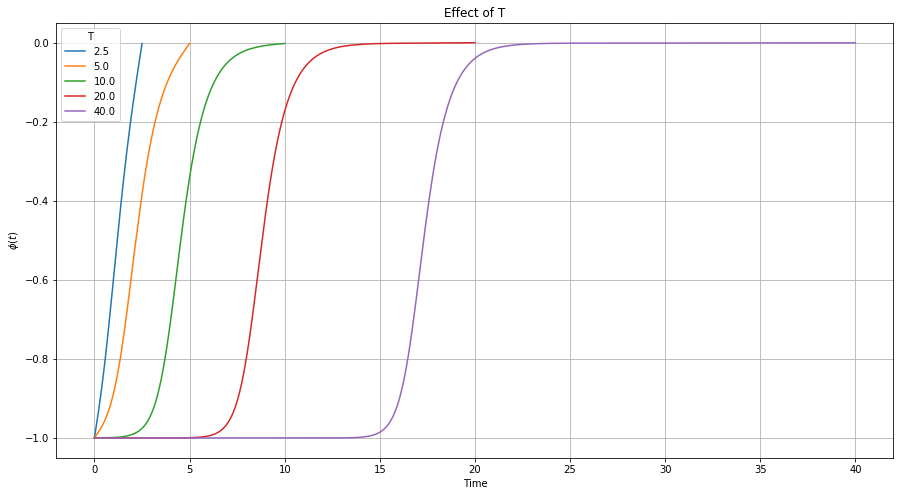

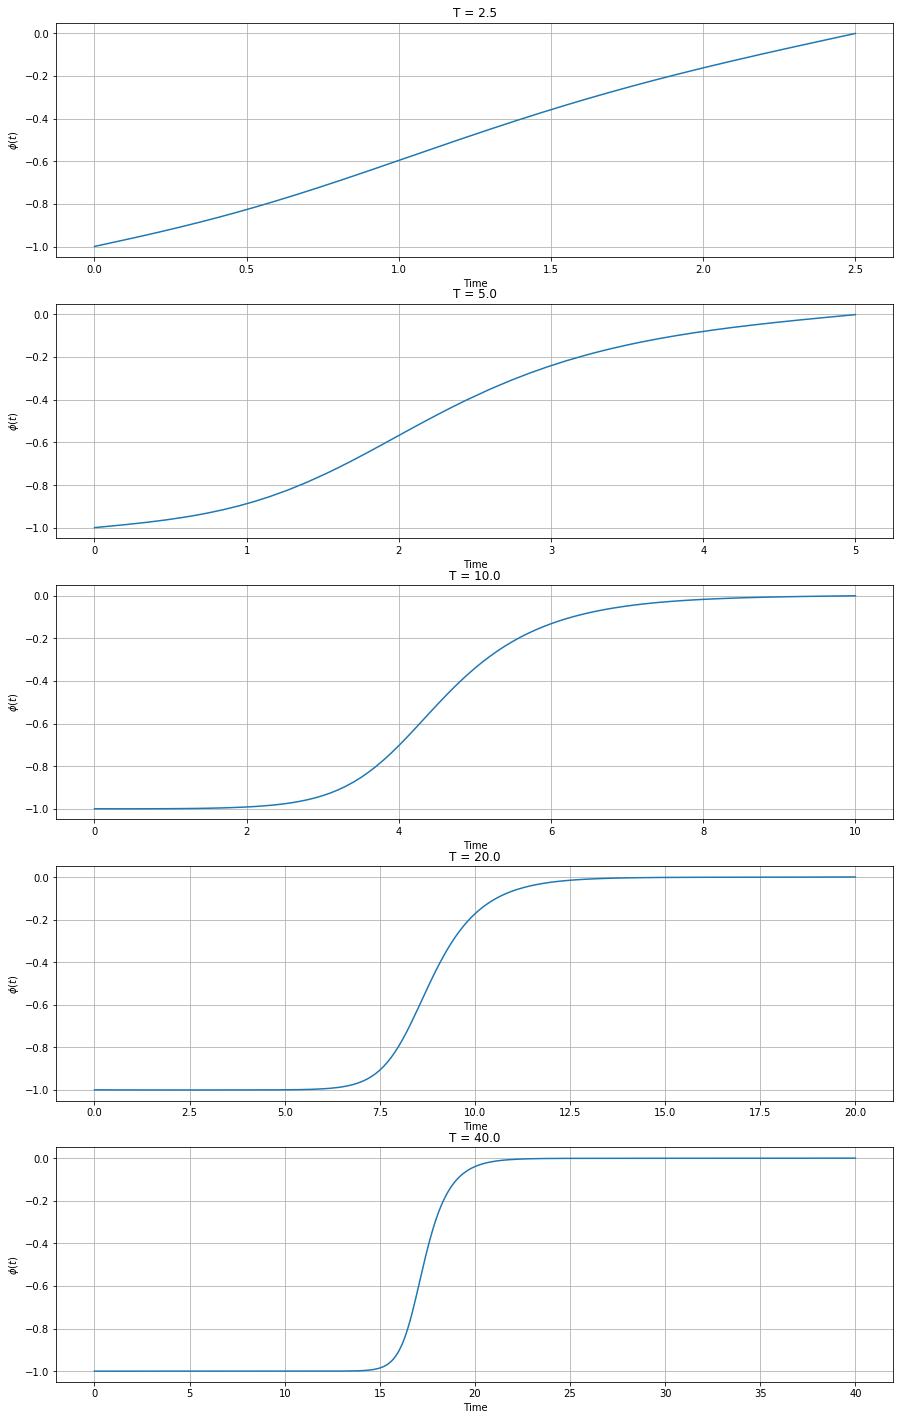

In [7]:
# Plotting Output

# Comparison Plot
fig, ax = plt.subplots(figsize=(15, 8))

ax.grid()
ax.set_title('Effect of T')
ax.set_xlabel('Time')
ax.set_ylabel('$\\phi(t)$')

for (time, instanton) in t_experiment:
    ax.plot(time, instanton, label=f'{time[-1]:.1f}')

ax.legend(title='T')
fig.show()

# Individual Time Series Plots

fig, axes = plt.subplots(len(t_experiment), 1, figsize=(15, len(t_experiment) * 5))
for (ax, (time, instanton)) in zip(axes, t_experiment):
    ax.grid()
    ax.plot(time, instanton)
    ax.set_title(f'T = {time[-1]:.1f}')
    ax.set_xlabel('Time')
    ax.set_ylabel('$\\phi(t)$')
fig.show()

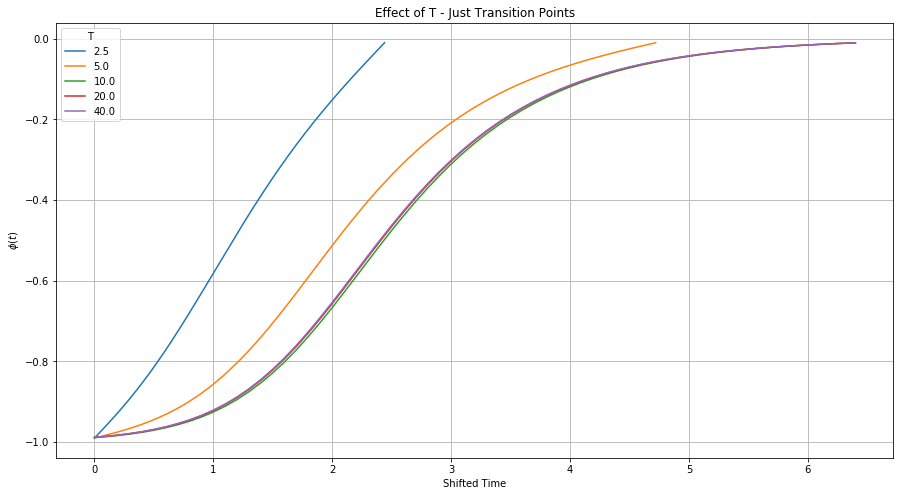

In [8]:
# Plotting Just Transition Points
# Comparison Plot
fig, ax = plt.subplots(figsize=(15, 8))

ax.grid()
ax.set_title('Effect of T - Just Transition Points')
ax.set_xlabel('Shifted Time')
ax.set_ylabel('$\\phi(t)$')

for (time, instanton) in t_experiment:
    condition = np.where(np.logical_and(instanton>=-0.99, instanton<=-0.01))
    ax.plot(time[condition] - min(time[condition]), instanton[condition], label=f'{time[-1]:.1f}')
    
ax.legend(title='T')
fig.show()